c:\Users\user\.pyenv-win-venv\envs\ciber3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6750 - loss: 0.6724
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6750 - loss: 0.6101
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6375 - loss: 0.6195
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6500 - loss: 0.5877
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6750 - loss: 0.5600
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7250 - loss: 0.4886
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7000 - loss: 0.5075
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7250 - loss: 0.4897
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7625 - loss: 0.4480
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7750 - loss: 0.4372
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8000 - loss: 0.4319
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8000 - lo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │        10,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,818 (120.39 KB)

 Trainable params: 10,272 (40.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,546 (80.26 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Training loss: 0.0603, accuracy: 0.9625


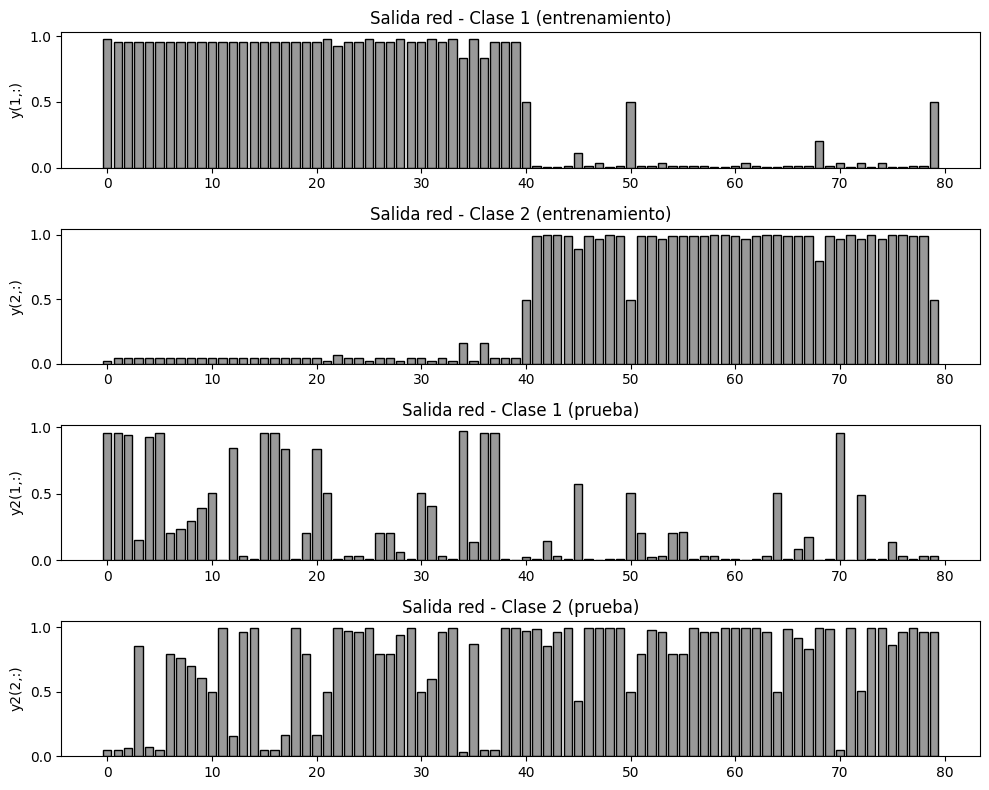

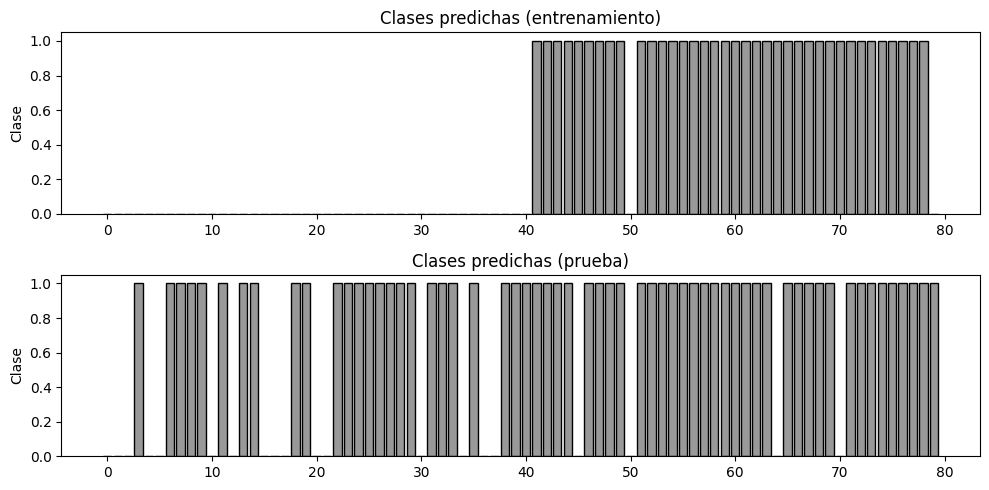

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# --- Limpiar entorno
plt.close('all')

# --- Configuración de estilo
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.facecolor'] = 'white'

# --- Cargar datos .mat
cat_data = loadmat('catData_w.mat')
dog_data = loadmat('dogData_w.mat')

cat_wave = cat_data['cat_wave']
dog_wave = dog_data['dog_wave']

# --- Concatenar los datos
CD = np.hstack((dog_wave, cat_wave))

# x → primeras 40 columnas de cada clase
x = np.hstack((dog_wave[:, 0:40], cat_wave[:, 0:40]))

# x2 → columnas 41 a 80 de cada clase
x2 = np.hstack((dog_wave[:, 40:80], cat_wave[:, 40:80]))

# 40 perros (1,0) + 40 gatos (0,1)
label = np.array([[1, 0]] * 40 + [[0, 1]] * 40).T

# Red equivalente a patternnet(10, 'trainscg')
model = Sequential([
    Dense(10, activation='tanh', input_shape=(x.shape[0],)),  # capa oculta con 'tansig' (tanh)
    Dense(2, activation='softmax')  # salida de 2 clases
])

# Compilar el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- Transponer los datos
X = x.T
X2 = x2.T
y = label.T

# --- Entrenar el modelo
history = model.fit(X, y, epochs=500, verbose=1)

# --- Mostrar arquitectura (como view(net))
model.summary()

# --- Predicciones
y_pred = model.predict(X)
y2_pred = model.predict(X2)

# --- Evaluar rendimiento
loss, acc = model.evaluate(X, y, verbose=0)
print(f"Training loss: {loss:.4f}, accuracy: {acc:.4f}")

# --- Convertir predicciones a clases
classes_train = np.argmax(y_pred, axis=1)
classes_test = np.argmax(y2_pred, axis=1)

# --- Figura 1: salidas de la red
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.bar(range(y_pred.shape[0]), y_pred[:, 0], color=[0.6, 0.6, 0.6], edgecolor='k')
plt.title('Salida red - Clase 1 (entrenamiento)')
plt.ylabel('y(1,:)')

plt.subplot(4, 1, 2)
plt.bar(range(y_pred.shape[0]), y_pred[:, 1], color=[0.6, 0.6, 0.6], edgecolor='k')
plt.title('Salida red - Clase 2 (entrenamiento)')
plt.ylabel('y(2,:)')

plt.subplot(4, 1, 3)
plt.bar(range(y2_pred.shape[0]), y2_pred[:, 0], color=[0.6, 0.6, 0.6], edgecolor='k')
plt.title('Salida red - Clase 1 (prueba)')
plt.ylabel('y2(1,:)')

plt.subplot(4, 1, 4)
plt.bar(range(y2_pred.shape[0]), y2_pred[:, 1], color=[0.6, 0.6, 0.6], edgecolor='k')
plt.title('Salida red - Clase 2 (prueba)')
plt.ylabel('y2(2,:)')
plt.tight_layout()

# --- Figura 2: clases predichas
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.bar(range(len(classes_train)), classes_train, color=[0.6, 0.6, 0.6], edgecolor='k')
plt.title('Clases predichas (entrenamiento)')
plt.ylabel('Clase')

plt.subplot(2, 1, 2)
plt.bar(range(len(classes_test)), classes_test, color=[0.6, 0.6, 0.6], edgecolor='k')
plt.title('Clases predichas (prueba)')
plt.ylabel('Clase')
plt.tight_layout()

plt.show()